In [1]:
import nltk

In [2]:
#nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\user\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\user\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
import pandas as pd

In [5]:
data = pd.read_csv('/Users/user/Desktop/Progress/1/Udemy - Python for Data Science and Machine Learning/24. Natural Language Processing/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [6]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages = [line.rstrip() for line in open('/Users/user/Desktop/Progress/1/Udemy - Python for Data Science and Machine Learning/24. Natural Language Processing/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection')]

In [9]:
len(messages)

5574

In [10]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [14]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

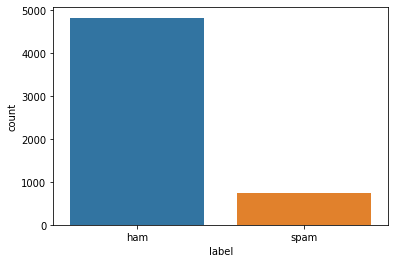

In [16]:
sns.countplot(data['label'])

In [17]:
data['length'] = data['message'].apply(lambda x: len(x))

In [18]:
data.head(10)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


<AxesSubplot:xlabel='length', ylabel='Count'>

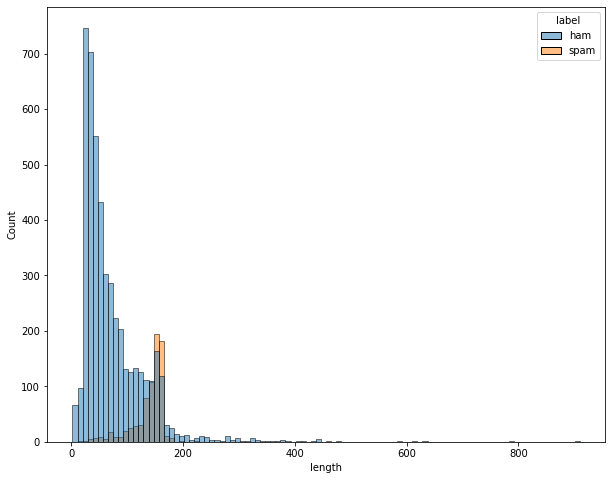

In [33]:
plt.figure(figsize=(10,8),alpha=0.5)
sns.histplot(x=data['length'],hue=data['label'],bins=100)

In [28]:
data[['message','label']].groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [29]:
data.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [45]:
data[data['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

<Figure size 20x16 with 0 Axes>

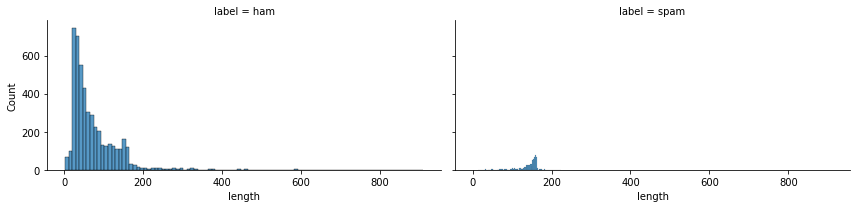

In [55]:
plt.figure(figsize=(10,8),alpha=0.5,dpi=2)
grid = sns.FacetGrid(col='label',data=data,aspect=2)
grid.map(sns.histplot,'length',bins=100)

In [56]:
import string

In [58]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
water ='i like to drimk water a lot, such that i drink like 5 litres everday.....crazy right!!!!'
no_water = [i for i in water if i not in string.punctuation]
no_water

['i',
 ' ',
 'l',
 'i',
 'k',
 'e',
 ' ',
 't',
 'o',
 ' ',
 'd',
 'r',
 'i',
 'm',
 'k',
 ' ',
 'w',
 'a',
 't',
 'e',
 'r',
 ' ',
 'a',
 ' ',
 'l',
 'o',
 't',
 ' ',
 's',
 'u',
 'c',
 'h',
 ' ',
 't',
 'h',
 'a',
 't',
 ' ',
 'i',
 ' ',
 'd',
 'r',
 'i',
 'n',
 'k',
 ' ',
 'l',
 'i',
 'k',
 'e',
 ' ',
 '5',
 ' ',
 'l',
 'i',
 't',
 'r',
 'e',
 's',
 ' ',
 'e',
 'v',
 'e',
 'r',
 'd',
 'a',
 'y',
 'c',
 'r',
 'a',
 'z',
 'y',
 ' ',
 'r',
 'i',
 'g',
 'h',
 't']

In [60]:
from nltk.corpus import stopwords

In [65]:
stop_words = stopwords.words('english')

In [67]:
no_water = ''.join(no_water)
no_water = no_water.split()
cleaned = [i for i in no_water if i.lower() not in stop_words]
cleaned

['like',
 'drimk',
 'water',
 'lot',
 'drink',
 'like',
 '5',
 'litres',
 'everdaycrazy',
 'right']

In [108]:
def remove_stop_words(mess):
    #removes punctuation and stop words(tokenization)
    no_punc = [i for i in mess if i not in string.punctuation]
    no_punc = ''.join(no_punc)
    no_stops = [i for i in no_punc.split() if i.lower() not in stop_words]
    no_stops = ' '.join(no_stops)
    return no_stops

In [109]:
remove_stop_words('i like to drink water a lot, such that i drink like 5 litres everday.....crazy right!!!!')

'like drink water lot drink like 5 litres everdaycrazy right'

In [110]:
data['cleaned_text'] = data['message'].apply(remove_stop_words)

In [111]:
data['cleaned_text_len'] = data['cleaned_text'].apply(len)

In [112]:
data.head()

,label,message,length,cleaned_text,cleaned_text_len
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...,82
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni,23
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry 2 wkly comp win FA Cup final tkts 2...,135
3,ham,U dun say so early hor... U c already then say...,49,U dun say early hor U c already say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah dont think goes usf lives around though,43


In [122]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [114]:
cv = CountVectorizer()
bag_of_words = cv.fit(data['cleaned_text'])

In [115]:
print(len(bag_of_words.vocabulary_))

9437


In [132]:
water = bag_of_words.transform([water])
print(water)

  (0, 2497)	1
  (0, 2969)	1
  (0, 5000)	2
  (0, 5044)	1
  (0, 5118)	1
  (0, 7017)	1
  (0, 8245)	1
  (0, 8954)	1


In [163]:
bag_of_words.transform(['like'])

<1x9437 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [123]:
message_bow = bag_of_words.transform(data['message'])

In [129]:
tfidf_transform = TfidfTransformer().fit(message_bow)

In [133]:
water1 = tfidf_transform.transform(water)
print(water1)

  (0, 8954)	0.37677556245608546
  (0, 8245)	0.17647721436862196
  (0, 7017)	0.26897271756690716
  (0, 5118)	0.30947822059884766
  (0, 5044)	0.46564188382877153
  (0, 5000)	0.43658937224450106
  (0, 2969)	0.3482849432992399
  (0, 2497)	0.36060758569784157


In [135]:
messages_tfidf = tfidf_transform.transform(message_bow)

In [148]:
from sklearn.naive_bayes import MultinomialNB

In [149]:
spam_or_ham = MultinomialNB().fit(messages_tfidf,data['label'])


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix

In [155]:
pipeline = Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('classifier',MultinomialNB())
    
])
msg_train,msg_test,label_train,label_test = train_test_split(data['cleaned_text'],data['label'],test_size=0.3)
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [157]:
predictions = pipeline.predict(msg_test)

In [158]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1442
        spam       1.00      0.67      0.80       230

    accuracy                           0.95      1672
   macro avg       0.97      0.83      0.89      1672
weighted avg       0.96      0.95      0.95      1672



In [159]:
print(pipeline.score(msg_train,label_train))

0.978974358974359


In [160]:
print(confusion_matrix(label_test,predictions))

[[1442    0]
 [  76  154]]
